# Name: Sneh Chitalia
# Task 1: Prediction using Supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Dataset. 
Dataset is read via the URL provided and is coverted into pandas dataframe.

In [2]:
url = "http://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Summary of the data. 
- checking for columns containing NA values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- Displaying statistics for each column

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the dataset. 

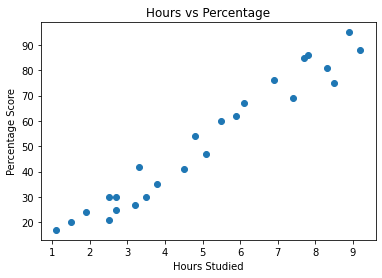

In [5]:
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Splitting the dataset. 
- Dataset is split into Train and Test.
- The 80-20 rule is followed. 80% training data and 20% test data.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='Scores'),
    data.Scores,
    test_size=0.20,
    random_state=0,
)
X_train.head(2)

,Hours
22,3.8
17,1.9


# Visualize Train and Test data

Text(0.5, 1.0, 'Training Data')

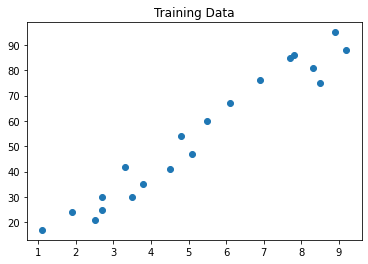

In [8]:
plt.scatter(X_train,y_train)
plt.title('Training Data')

Text(0.5, 1.0, 'Test Data')

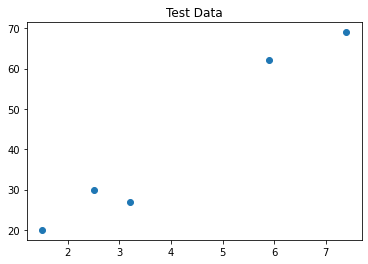

In [9]:
plt.scatter(X_test,y_test)
plt.title('Test Data')

# Training the Linear Regression Model 

In [10]:
linreg = LinearRegression().fit(X_train,y_train)

# Visualizing the model

In [11]:
line=linreg.coef_*data.Hours+linreg.intercept_

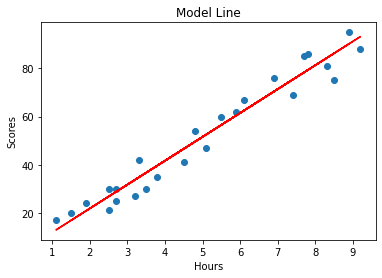

In [12]:
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, line,color='Red');
plt.title('Model Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Predicting test values to calculate Error.

In [13]:
pred=linreg.predict(X_test)

# Visualizing Predicted and Actual values.

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Text(0.5, 1.0, 'Predicted VS Actual')

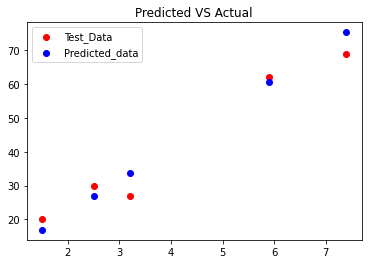

In [15]:
plt.scatter(X_test,y_test,color='red',label='Test_Data')
plt.scatter(X_test,pred,color='blue',label='Predicted_data')
plt.legend()
plt.title('Predicted VS Actual')

# Own Prediction.  
- Hours = 9.25.
- Score has to be predicted for this using our Linear Regression model

In [16]:
hours = np.array(9.25).reshape(-1, 1)
own_pred = linreg.predict(hours)
print("No of Hours: "+str(hours[0][0]))
print("Predicted Score: "+str(own_pred[0]))

No of Hours: 9.25
Predicted Score: 93.69173248737539


# Evaluating the model.  
- Model can be evaluated using various metrics.
- Here, mean absolute error is used.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 4.183859899002982
